### COVID19 Global Forecasting (Week 4)
#### Forecast daily COVID-19 spread in regions around world

-------------------------------------------------------------------------------------------------------------------------------

https://www.kaggle.com/c/covid19-global-forecasting-week-4/data

### Data Description

###  Files

       - train.csv - the training data (you are encouraged to join in many more useful external datasets)
    
       - test.csv -  the dates to predict; there is a week of overlap with the training data for the initial Public
        
                     leaderboard. Once submissions are paused, the Public leaderboard will update based on last 28 days
            
                     of predicted data.
                
        - submission.csv - a sample submission in the correct format; again, predictions should be cumulative

### Read data

In [5]:
import numpy as np
import pandas as pd

In [6]:
url = "C:/Users/deepusuresh/Documents/Data Science/2. Week 4"

covid_train = pd.read_csv("train.csv")
covid_train.head()

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,2020-01-26,0.0,0.0


In [5]:
covid_test = pd.read_csv("test.csv")
covid_test.head()

,ForecastId,Province_State,Country_Region,Date
0,1,NaN,Afghanistan,2020-04-02
1,2,NaN,Afghanistan,2020-04-03
2,3,NaN,Afghanistan,2020-04-04
3,4,NaN,Afghanistan,2020-04-05
4,5,NaN,Afghanistan,2020-04-06


### Dataframe Details

In [38]:
covid_train.shape

(32239, 6)

In [39]:
covid_test.shape

(13459, 4)

In [40]:
covid_train.columns

Index(['Id', 'Province_State', 'Country_Region', 'Date', 'ConfirmedCases',
       'Fatalities'],
      dtype='object')

In [41]:
covid_test.columns

Index(['ForecastId', 'Province_State', 'Country_Region', 'Date'], dtype='object')

In [42]:
covid_train.count()

Id                32239
Province_State    13699
Country_Region    32239
Date              32239
ConfirmedCases    32239
Fatalities        32239
dtype: int64

In [43]:
covid_test.count()

ForecastId        13459
Province_State     5719
Country_Region    13459
Date              13459
dtype: int64

In [44]:
covid_train.describe()

,Id,ConfirmedCases,Fatalities
count,32239.000000,32239.000000,32239.000000
mean,17836.000000,2602.909395,167.581687
std,10300.656249,14972.757815,1434.819971
min,1.000000,0.000000,0.000000
25%,8918.500000,0.000000,0.000000
50%,17836.000000,10.000000,0.000000
75%,26753.500000,328.000000,4.000000
max,35671.000000,316415.000000,28884.000000


In [45]:
covid_test.describe()

,ForecastId
count,13459.000000
mean,6730.000000
std,3885.422971
min,1.000000
25%,3365.500000
50%,6730.000000
75%,10094.500000
max,13459.000000


In [46]:
covid_train.isna().sum()

Id                    0
Province_State    18540
Country_Region        0
Date                  0
ConfirmedCases        0
Fatalities            0
dtype: int64

In [47]:
covid_test.isna().sum()

ForecastId           0
Province_State    7740
Country_Region       0
Date                 0
dtype: int64

### Missing Values

In [77]:
covid_train.isna().any()

Id                False
State              True
Country           False
Date              False
ConfirmedCases    False
Fatalities        False
dtype: bool

In [78]:
print(covid_train.isnull().sum())

Id                    0
State             18540
Country               0
Date                  0
ConfirmedCases        0
Fatalities            0
dtype: int64


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

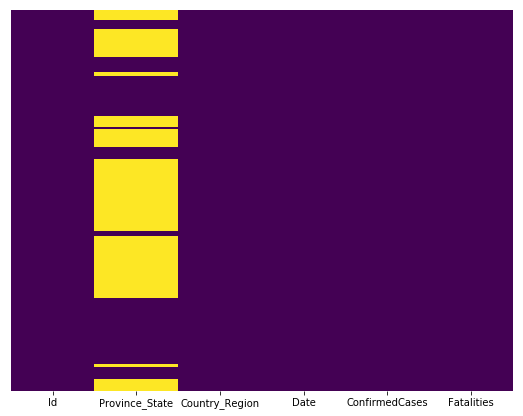

In [14]:
plt.figure(figsize=(9,7))    # width, height
sns.heatmap(covid_train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

### Data Preprocessing

#### Rename the Columns of Train and Test Datasets

In [49]:
covid_train.rename(columns={'Country_Region':'Country'}, inplace=True)
covid_test.rename(columns={'Country_Region':'Country'}, inplace=True)

covid_train.rename(columns={'Province_State':'State'}, inplace=True)
covid_test.rename(columns={'Province_State':'State'}, inplace=True)

In [50]:
covid_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32239 entries, 0 to 32238
Data columns (total 6 columns):
Id                32239 non-null int64
State             13699 non-null object
Country           32239 non-null object
Date              32239 non-null object
ConfirmedCases    32239 non-null float64
Fatalities        32239 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 1.5+ MB


In [51]:
covid_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13459 entries, 0 to 13458
Data columns (total 4 columns):
ForecastId    13459 non-null int64
State         5719 non-null object
Country       13459 non-null object
Date          13459 non-null object
dtypes: int64(1), object(3)
memory usage: 420.7+ KB


In [52]:
covid_train[covid_train['Country']=='China'].groupby(by='Country').sum()

,Id,ConfirmedCases,Fatalities
Country,,,
China,27300768,6938820.0,277995.0


In [53]:
covid_train.loc[covid_train.Country == 'China', :].head(10)

,Id,State,Country,Date,ConfirmedCases,Fatalities
5562,6157,Anhui,China,2020-01-22,1.0,0.0
5563,6158,Anhui,China,2020-01-23,9.0,0.0
5564,6159,Anhui,China,2020-01-24,15.0,0.0
5565,6160,Anhui,China,2020-01-25,39.0,0.0
5566,6161,Anhui,China,2020-01-26,60.0,0.0
5567,6162,Anhui,China,2020-01-27,70.0,0.0
5568,6163,Anhui,China,2020-01-28,106.0,0.0
5569,6164,Anhui,China,2020-01-29,152.0,0.0
5570,6165,Anhui,China,2020-01-30,200.0,0.0
5571,6166,Anhui,China,2020-01-31,237.0,0.0


In [54]:
covid_train[~covid_train['State'].isnull()]['Country'].value_counts()

US                5562
China             3399
Canada            1236
France            1030
United Kingdom    1030
Australia          824
Netherlands        412
Denmark            206
Name: Country, dtype: int64

In [55]:
covid_train.corr()

,Id,ConfirmedCases,Fatalities
Id,1.000000,0.05520,0.040441
ConfirmedCases,0.055200,1.00000,0.897570
Fatalities,0.040441,0.89757,1.000000


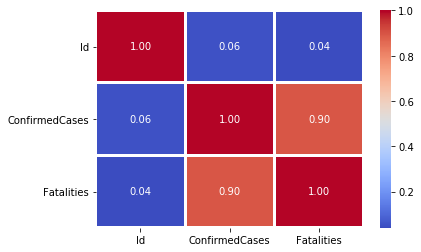

In [57]:
sns.heatmap(covid_train.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=2)

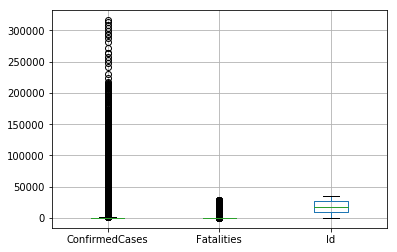

In [58]:
covid_train.boxplot(column=['ConfirmedCases', 'Fatalities','Id'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022B70BFB4E0>,
      dtype=object)

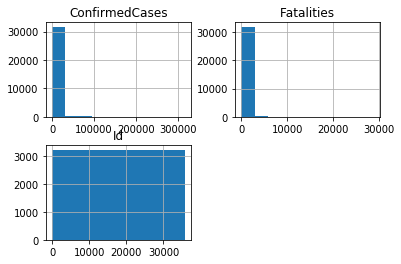

In [79]:
covid_train.hist()

### Converting Date Time object

In [60]:
import time
from datetime import datetime

In [61]:
covid_train['Date']=pd.to_datetime(covid_train['Date'],infer_datetime_format=True)
covid_test['Date']=pd.to_datetime(covid_test['Date'],infer_datetime_format=True)

In [62]:
covid_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32239 entries, 0 to 32238
Data columns (total 6 columns):
Id                32239 non-null int64
State             13699 non-null object
Country           32239 non-null object
Date              32239 non-null datetime64[ns]
ConfirmedCases    32239 non-null float64
Fatalities        32239 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 1.5+ MB


In [63]:
covid_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13459 entries, 0 to 13458
Data columns (total 4 columns):
ForecastId    13459 non-null int64
State         5719 non-null object
Country       13459 non-null object
Date          13459 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 420.7+ KB


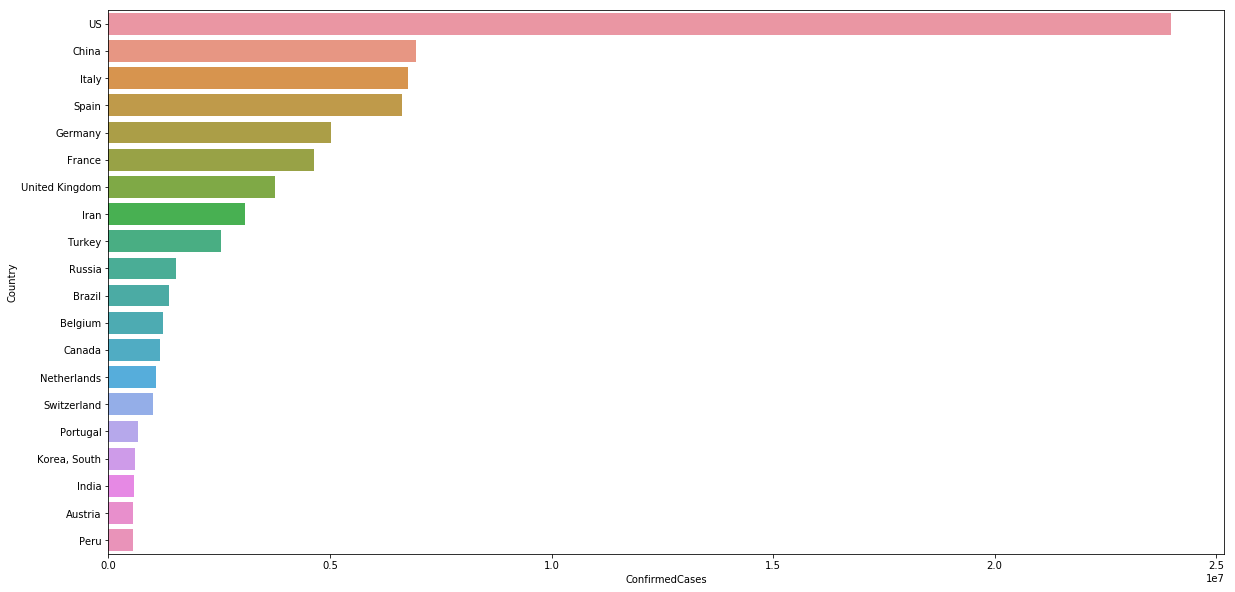

In [69]:
Groupby = covid_train.groupby(by='Country')[['ConfirmedCases','Fatalities']].sum().reset_index()
plt.figure(figsize=(20,10))

sns.barplot(x='ConfirmedCases',y='Country',data=Groupby[Groupby['ConfirmedCases'] != 0].sort_values(by='ConfirmedCases',ascending=False).head(20))

In [70]:
Groupby[Groupby['ConfirmedCases'] != 0].sort_values(by='ConfirmedCases',ascending=False).head(10)

,Country,ConfirmedCases,Fatalities
171,US,23989550.0,1177454.0
36,China,6938820.0,277995.0
84,Italy,6767086.0,846530.0
156,Spain,6626957.0,677646.0
65,Germany,5026391.0,139560.0
61,France,4637712.0,582423.0
175,United Kingdom,3756743.0,553301.0
80,Iran,3072919.0,194144.0
170,Turkey,2529795.0,60559.0
138,Russia,1514893.0,13848.0


### Linear Regression

In [80]:
covid_x=covid_train.drop(['ConfirmedCases','Country','State','Date'],axis='columns')
covid_x.head()

,Id,Fatalities
0,1,0.0
1,2,0.0
2,3,0.0
3,4,0.0
4,5,0.0


In [81]:
covid_y=pd.DataFrame(covid_train.iloc[:,-2])
covid_y.head()

,ConfirmedCases
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [82]:
# Splitting X and y into training and testing sets

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(covid_x,covid_y)
from sklearn.linear_model import LinearRegression

In [83]:
regression=LinearRegression()
regression.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [84]:
print(X_train.shape)
print(X_test.shape)

(24179, 2)
(8060, 2)


### Logistic Regression

In [75]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

LR.fit(X_train,Y_train)

C:\Users\deepusuresh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\deepusuresh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

### Decision Tree

In [86]:
from sklearn.tree import DecisionTreeRegressor

In [87]:
tree_regressor=DecisionTreeRegressor()
tree_regressor.fit(X_train,Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [88]:
y_pred_tree=tree_regressor.predict(X_test)
y_tree_pred_df=pd.DataFrame(y_pred_tree,columns=['Predict_tree'])
y_tree_pred_df.head()

,Predict_tree
0,484.0
1,93657.0
2,1.0
3,16.0
4,0.0


In [89]:
DTCscore = tree_regressor.score(X_train,Y_train)
print("Decision Tree Score: ",DTCscore)

Decision Tree Score:  1.0


### Random Forest Classifier

In [90]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(X_train,Y_train)

C:\Users\deepusuresh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\deepusuresh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [91]:
RFC.score(X_train,Y_train)

0.9724967947392366

In [ ]:
sub=pd.read_csv('/kaggle/input/covid19-global-forecasting-week-2/submission.csv')
sub.to_csv('submission.csv',index=False)